In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

## Data Preprocessing

In [2]:
data = pd.read_csv('card_transdata.csv')
df = data.copy() # To keep the data as backup
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Features Distribution

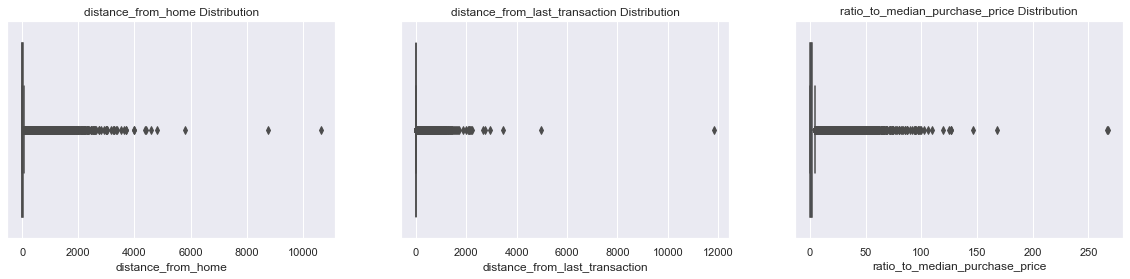

In [7]:

num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

fig, ax = plt.subplots(1, 3, figsize=(20, 4))

for i, col in enumerate(num_features):
    sns.boxplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'{col} Distribution')

plt.show()


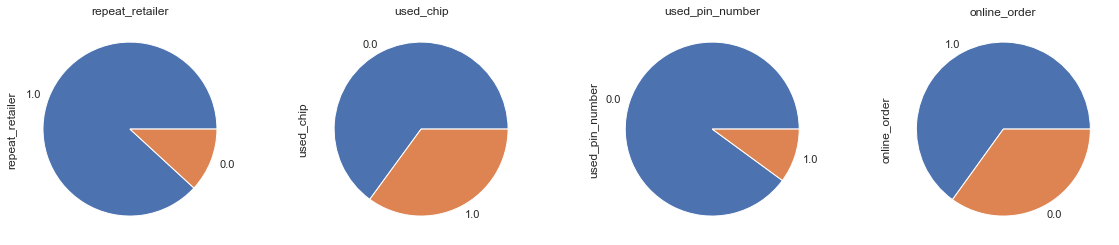

In [8]:
cat_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for i, col in enumerate(cat_features):
    df[col].value_counts().plot(kind='pie', ax=ax[i], title=col)

plt.show()

## Target Distribution

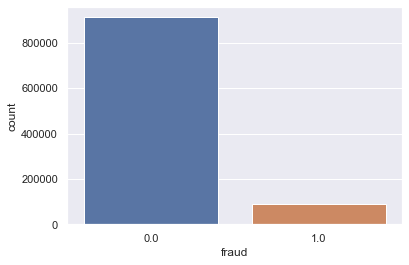

In [9]:
sns.countplot(data=df,x='fraud');

## Features Correlation with Target

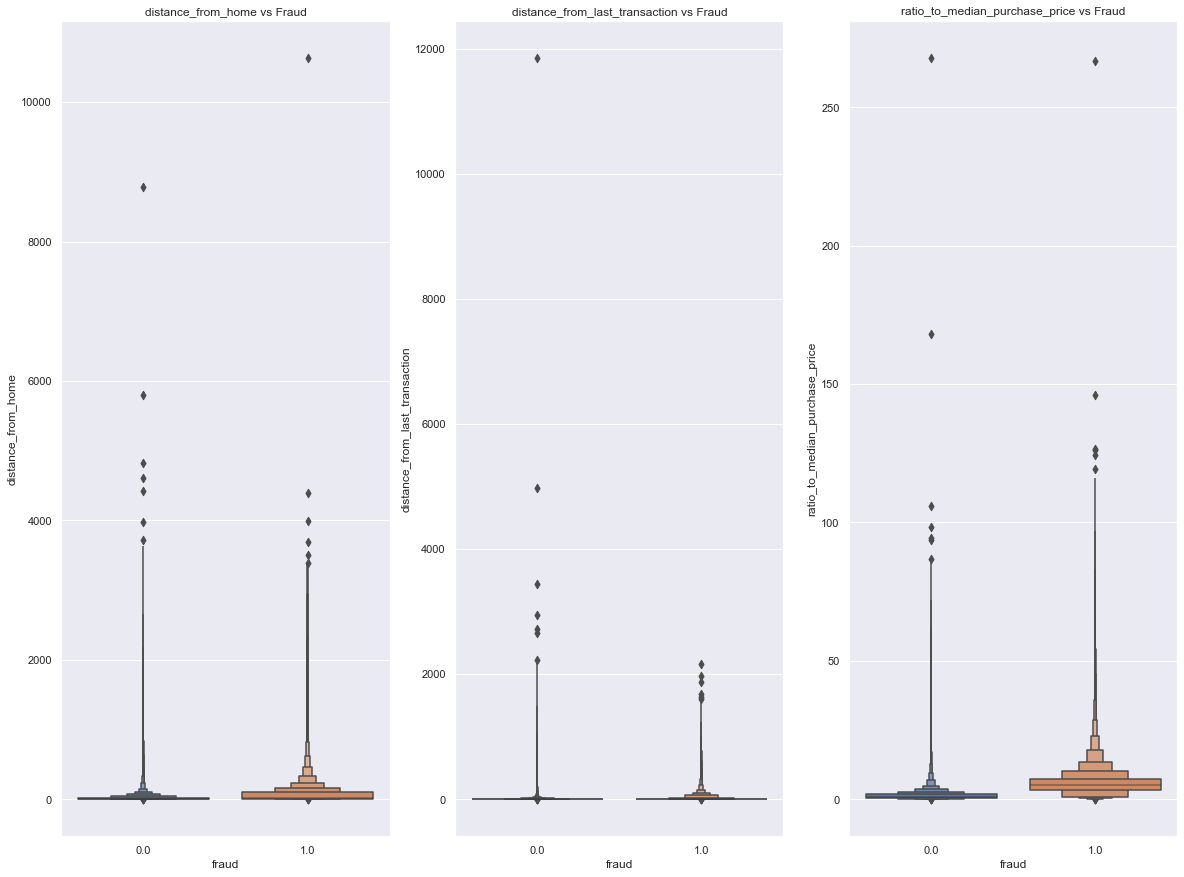

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

for i, col in enumerate(num_features):
    sns.boxenplot(x=df['fraud'], y=df[col], ax=ax[i])
    ax[i].set_title(f'{col} vs Fraud')

plt.show()

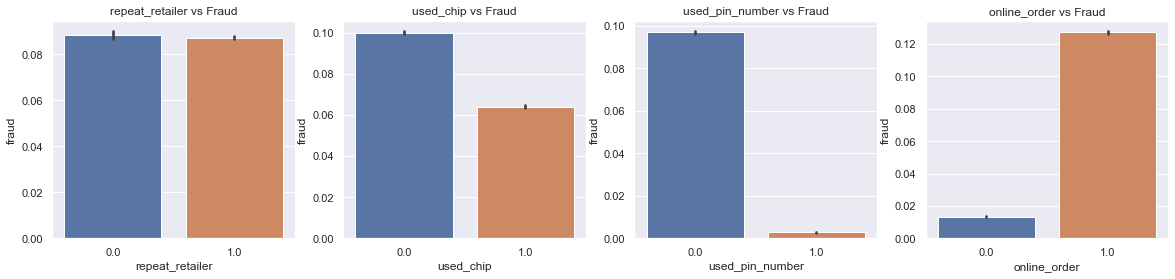

In [11]:
fig,ax = plt.subplots(1,4,figsize=(20,4))
for i,col in enumerate(cat_features):
    sns.barplot(data=df,x=col,y='fraud',ax=ax[i])
    ax[i].set_title(f'{col} vs Fraud')

### "All the features, except for 'repeat_retailer', exhibit a strong correlation with the target variable."

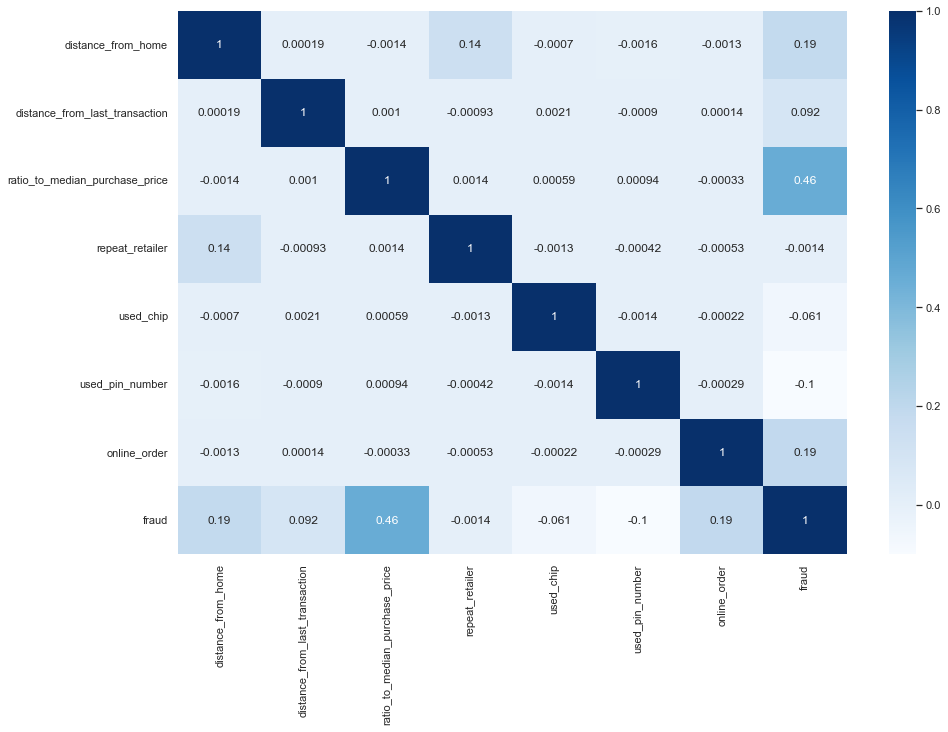

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()